1. A neural network is a machine learning algorythim inspired by the human brain, where the nodes within the program analyze and compute data within different layers. Then the network can learn and recognize patterns within the interconnected nodes. To make a neural network you need to preprocess the data, cleaning and making it formattable for the network, then split into into training sets. Then we need to choose the amount of layers that we're using which is suitable for the problem we're working with. Then for each sample or training set we need to calculate the loss between the predicted and actual outcome and fix any errors that may appear. Sometimes you may need to redo these last steps a couple times but finally you'll be able to evaluate the model and test its performance. 

2. After splitting the data into training and test sets and train the actual network with it you can run precision, recall, accuracy, or MSE (mean sqaured error). This sees how good the network is at using new data and how good it is at running overall. It can also identify things like overfitting if that happens.

In [1]:
import pandas as pd
import numpy as np
import math
import statistics
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, f1_score, auc

In [2]:
pd.options.mode.chained_assignment = None  

In [3]:
from ucimlrepo import fetch_ucirepo 
Adult = fetch_ucirepo(id=2) 

ax = Adult.data.features 
ay = Adult.data.targets 
  
print(Adult.variables) 

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

In [4]:
ax = ax.drop('fnlwgt', axis=1)
ax = ax.drop('education-num', axis=1)
ax = ax.drop('relationship', axis=1)
ax = ax.drop('occupation', axis=1)
ax = ax.drop('native-country', axis=1)
ax = ax.drop('marital-status', axis=1)
ax = ax.drop('race', axis=1)

In [5]:
ax = ax.rename(columns={"capital-gain": "CG", "capital-loss": "CL", 'hours-per-week': 'HPW' })

In [6]:
ax['education']=np.where(ax['education']=="Some-college","College_Lvl",
                        np.where(ax['education']=="Bachelors","College_Lvl",
                        np.where(ax['education']=="Masters","College_Lvl",
                        np.where(ax['education']=="Doctorate","College_Lvl",
                        np.where(ax['education']=="Assoc-voc","College_Lvl",
                        np.where(ax['education']=="Assoc-acdm","College_Lvl",
                           np.where(ax['education']=="Prof-school","College_Lvl",      
                        "Highschool_or_less")))))))

In [7]:
sex = {'Male':0,'Female':1}
ax['sex'] = ax['sex'].map(sex)

In [8]:
ax['workclass']=np.where(ax['workclass']=="Local-gov","Government",
                        np.where(ax['workclass']=="State-gov","Government",
                        np.where(ax['workclass']=="Federal-gov","Government",
                        np.where(ax['workclass']=="Self-emp-not-inc","Self Employed",
                        np.where(ax['workclass']=="Self-emp-inc","Self Employed",
                        np.where(ax['workclass']=="Without-pay","Volunteer",
                           np.where(ax['workclass']=="Private","Private",      
                        "No Job")))))))

In [9]:
edu = {'College_Lvl':0,'Highschool_or_less':1}
ax['education'] = ax['education'].map(edu)

In [10]:
job = {'Government':0,'Private':1, 'Self Employed':2, 'Volunteer':3, 'No Job':4}
ax['workclass'] = ax['workclass'].map(job)

In [11]:
ax.head()

,age,workclass,education,sex,CG,CL,HPW
0,39,0,0,0,2174,0,40
1,50,2,0,0,0,0,13
2,38,1,1,0,0,0,40
3,53,1,1,0,0,0,40
4,28,1,0,1,0,0,40


In [12]:
ay['income'] = np.where(ay["income"] == "<=50K.", "51", "50")

In [13]:
ay['income'] = ay['income'].astype(int)

In [14]:
ay.head(1)

,income
0,50


3. Clean the data or do additional cleaning if you have used the dataset for another assignment.

    I ended up doing much more cleaning than I did before, I dropped some data that I thought wouldn't really matter, switched some of the schooling classifications up to make it more cohesive, changed the sex values to numbers for better reading. And for the ay dataframe I changed the values to either equal to or less than 50K or over 50K so the classification report could be better. 

In [15]:
X = ax
y = ay['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=42, 
                                                    stratify=y)
regression = LogisticRegression(random_state=42).fit(X_train, y_train.values.ravel())
Y_predicted = regression.predict(X_test)

Y_predicted

c:\users\steven\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([50, 50, 50, ..., 50, 50, 50])

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [17]:
X_train = torch.tensor(X_train.values)
X_test = torch.tensor(X_test.values)
y_test = torch.tensor(y_test.values)
y_train = torch.tensor(y_train.values)

In [18]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,
                 hidden1=20,hidden2=20,
                 out_features=2):
        super().__init__() 
        """
        super is a computed indirect reference
        which means that it isolates changes and
        makes sure the children in the layers of
        multiple inheritance are calling 
        the right parents
        """
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [19]:
torch.manual_seed(40)

ann = ANN_Model()

In [20]:
loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(ann.parameters(), lr = 0.01)

In [21]:
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)

    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss {loss}')

    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 

RuntimeError: mat1 and mat2 must have the same dtype, but got Long and Float

In [22]:
y_pred = []

with torch.no_grad(): 
    for i, data in enumerate(X_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax()) 

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x7 and 8x20)

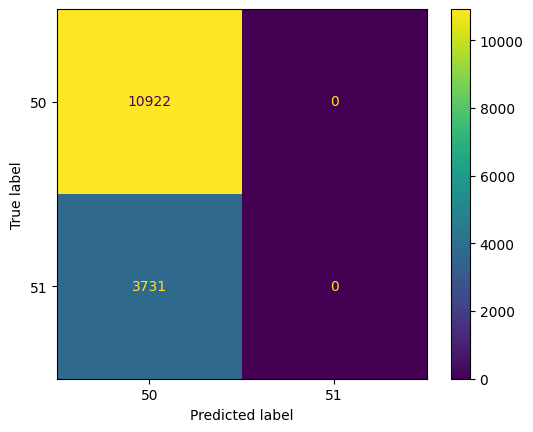

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test, Y_predicted)